# Data Exploration with Pandas

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [160]:
pokeDb = pd.read_csv('../data/Pokemon.csv')
pokeDb.info()
pokeDb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Het aantal pokemon type per generatie

maakt gebruik van grouping en unique()

In [161]:
pokeDb.groupby("Type 1").Legendary.count()

df5 = pokeDb.groupby("Generation")["Type 1"].unique()
df5

Generation
1    [Grass, Fire, Water, Bug, Normal, Poison, Elec...
2    [Grass, Fire, Water, Normal, Bug, Poison, Elec...
3    [Grass, Fire, Water, Dark, Normal, Bug, Psychi...
4    [Grass, Fire, Water, Normal, Bug, Electric, Ro...
5    [Psychic, Grass, Fire, Water, Normal, Dark, El...
6    [Grass, Fire, Water, Normal, Bug, Fairy, Fight...
Name: Type 1, dtype: object

## Het gemiddelde aantal HP per pokemon type

Maakt gebruik van grouping, rounding en plots

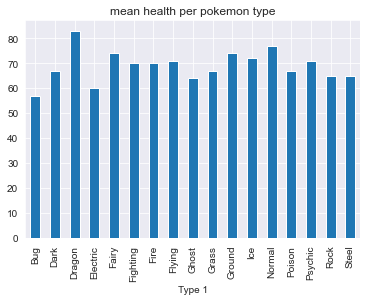

In [162]:
pokeDb.sort_values("HP", ascending=False)
mean_health_by_type = pokeDb.groupby('Type 1').HP.mean().round()
mean_health_by_type.iloc[:-1].plot(kind='bar',
                                   title='mean health per pokemon type');

## De beste pokemon

maakt gebruik van max()

In [163]:
pokeDb[(pokeDb.HP == pokeDb.HP.max()) | (pokeDb.Speed == pokeDb.Speed.max()) | (pokeDb.Attack == pokeDb.Attack.max()) | (pokeDb.Total == pokeDb.Total.max())]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
